<a href="https://colab.research.google.com/github/semishen/ML100Days/blob/master/Day004_Sample.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 範例

實作本篇提到的三大概念

- 翻轉：實作上下翻轉
- 縮放：實作鄰近差值
- 平移：建立 Translation Transformation Matrix 來做平移

In [0]:
import cv2
import time
import numpy as np
from google.colab.patches import cv2_imshow

img = cv2.imread('lena.png')

## 上下翻轉圖片

vflip


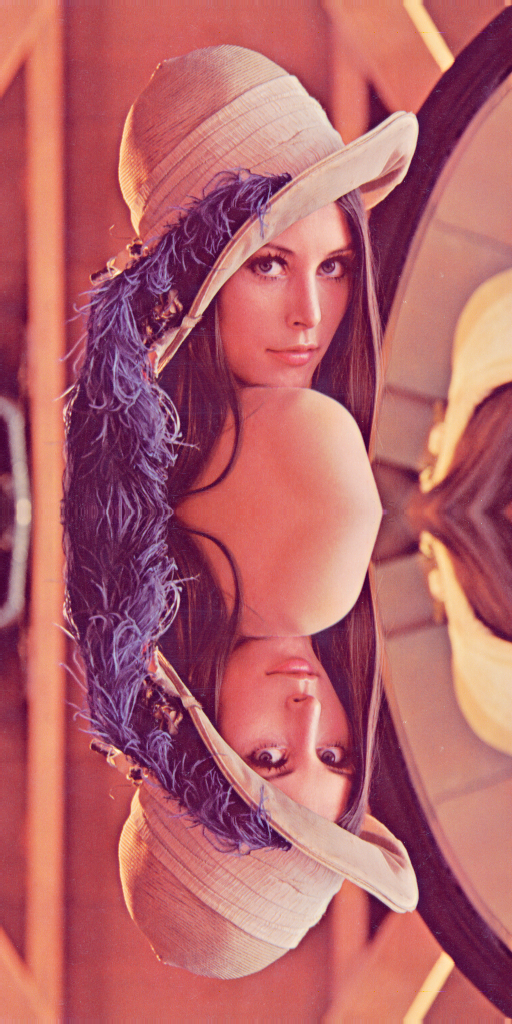

hflip


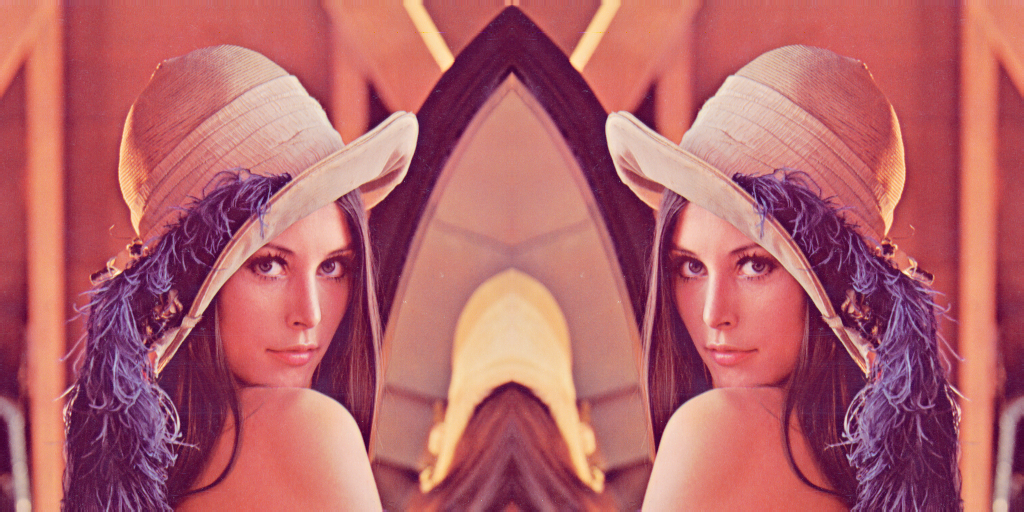

In [7]:
# 垂直翻轉 (vertical)
img_vflip = img[::-1, :, :]
img_hflip = img[:, ::-1, :]
# 組合 + 顯示圖片
vflip = np.vstack((img, img_vflip))
hflip = np.hstack((img, img_hflip))

print('vflip')
cv2_imshow(vflip)
print('hflip')
cv2_imshow(hflip)


## 縮放圖片

### 放大

我們先透過縮小圖片去壓縮原有圖片保有的資訊，再放大比較不同方法之間的速度與圖片品質

INTER_NEAREST zoom cost 0.009462594985961914


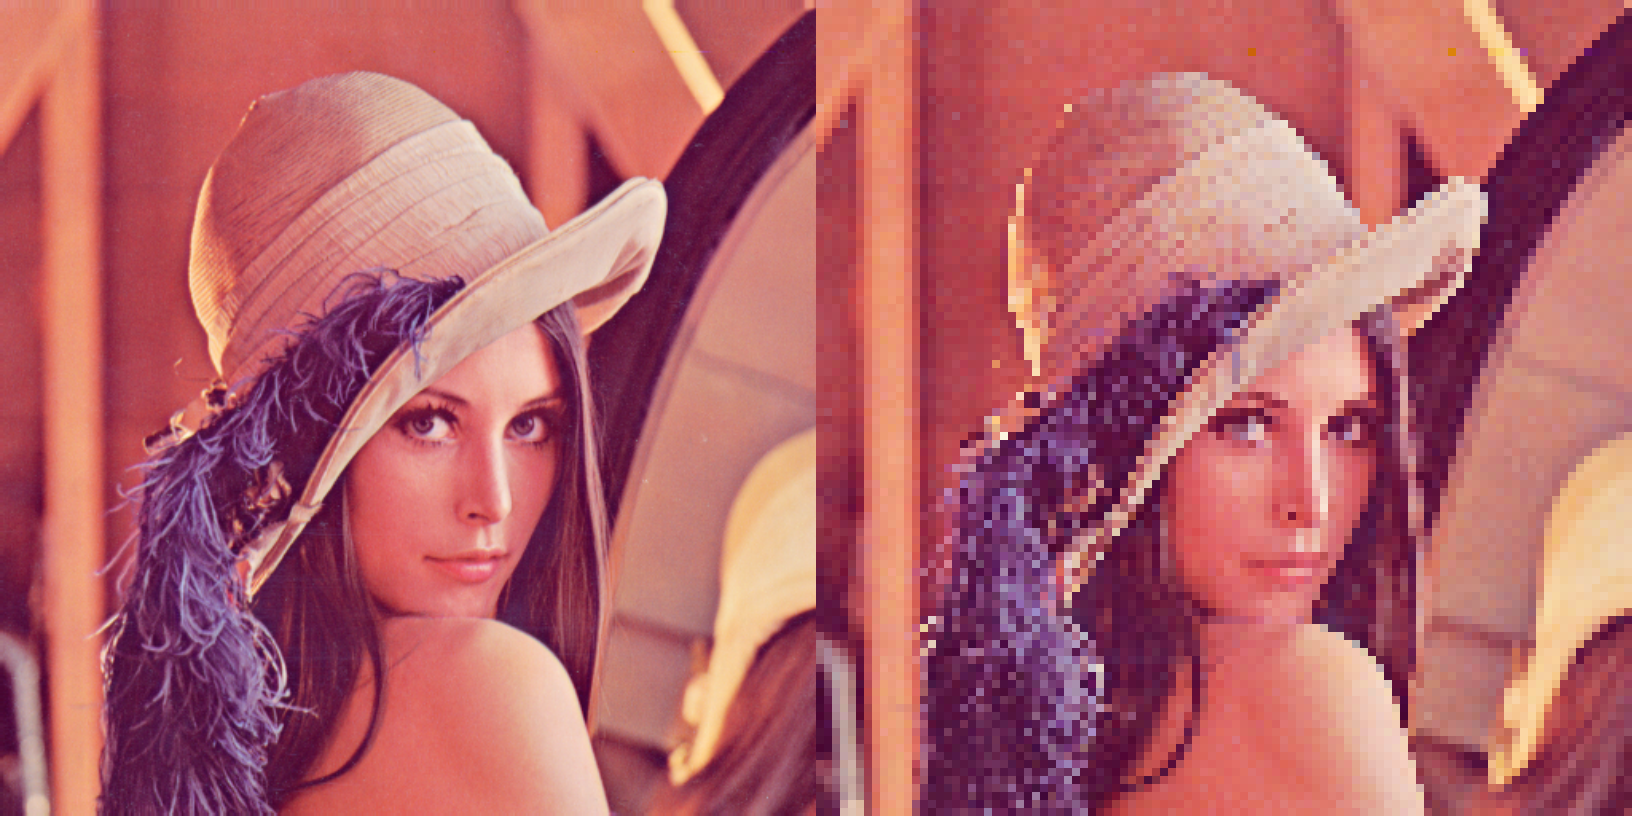

In [17]:
# 將圖片縮小成原本的 20%
img_test = cv2.resize(img, None, fx=0.2, fy=0.2)
# cv2_imshow(img_test)

# 將圖片放大為"小圖片"的 8 倍大 = 原圖的 1.6 倍大
fx, fy = 8, 8

# 鄰近差值 scale + 計算花費時間
start_time = time.time()
img_area_scale = cv2.resize(img_test, None, fx=fx, fy=fy, interpolation=cv2.INTER_NEAREST)
print('INTER_NEAREST zoom cost {}'.format(time.time() - start_time))

# 組合 + 顯示圖片
orig_img = cv2.resize(img, img_area_scale.shape[:2])# get (816, 816)
img_zoom = np.hstack((orig_img, img_area_scale))
cv2_imshow(img_zoom)

## 平移幾何轉換

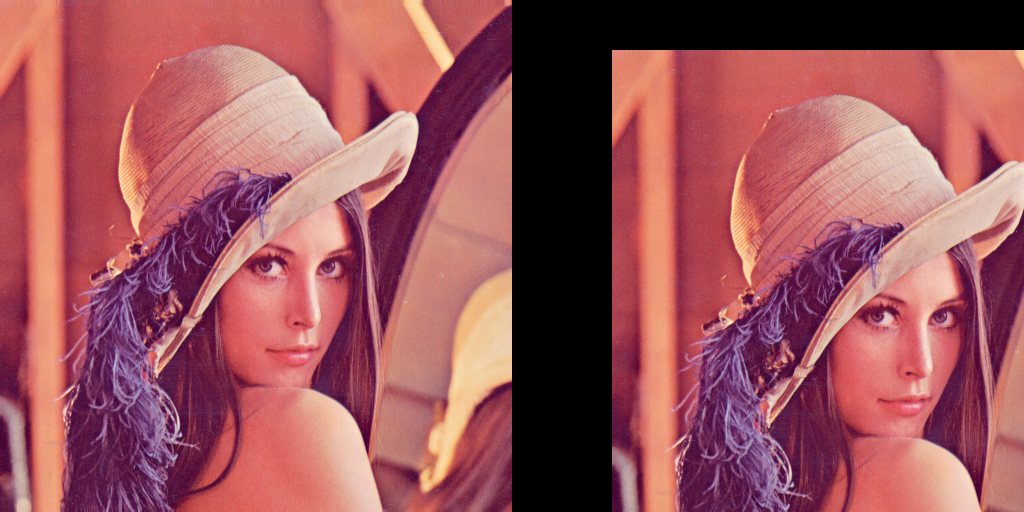

In [20]:
# 設定 translation transformation matrix
# x 平移 100 pixel; y 平移 50 pixel
M = np.array([[1, 0, 100],
              [0, 1, 50]], dtype=np.float32) # matrix in x,y domain
shift_img = cv2.warpAffine(img, M, (img.shape[1], img.shape[0]))

# 組合 + 顯示圖片
img_shift = np.hstack((img, shift_img))
cv2_imshow(img_shift)